In [1]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("advertising.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [4]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [5]:
tree_model= DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [6]:
y_pred= tree_model.predict(X_test)

In [7]:
print ('Classification Report: ', classification_report(y_test,y_pred))

Classification Report:                precision    recall  f1-score   support

           0       0.91      0.90      0.90        89
           1       0.92      0.93      0.92       111

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.92      0.91       200



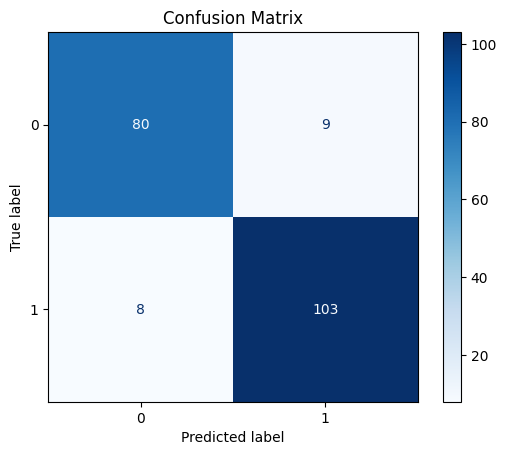

In [8]:
cm= confusion_matrix(y_test, y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

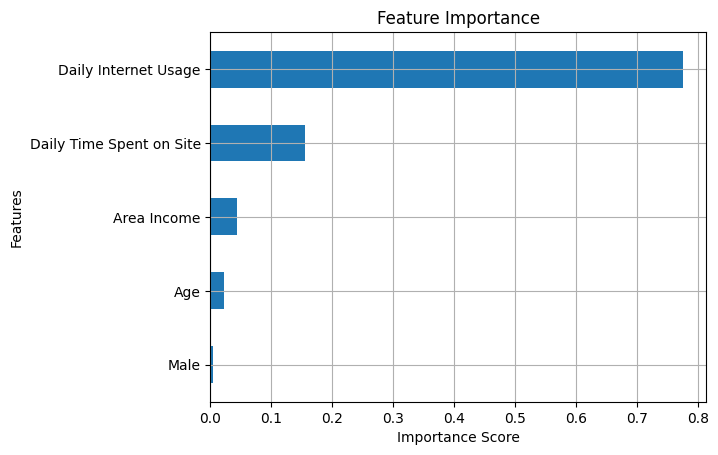

In [9]:
importances = pd.Series(tree_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', title='Feature Importance')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.show()

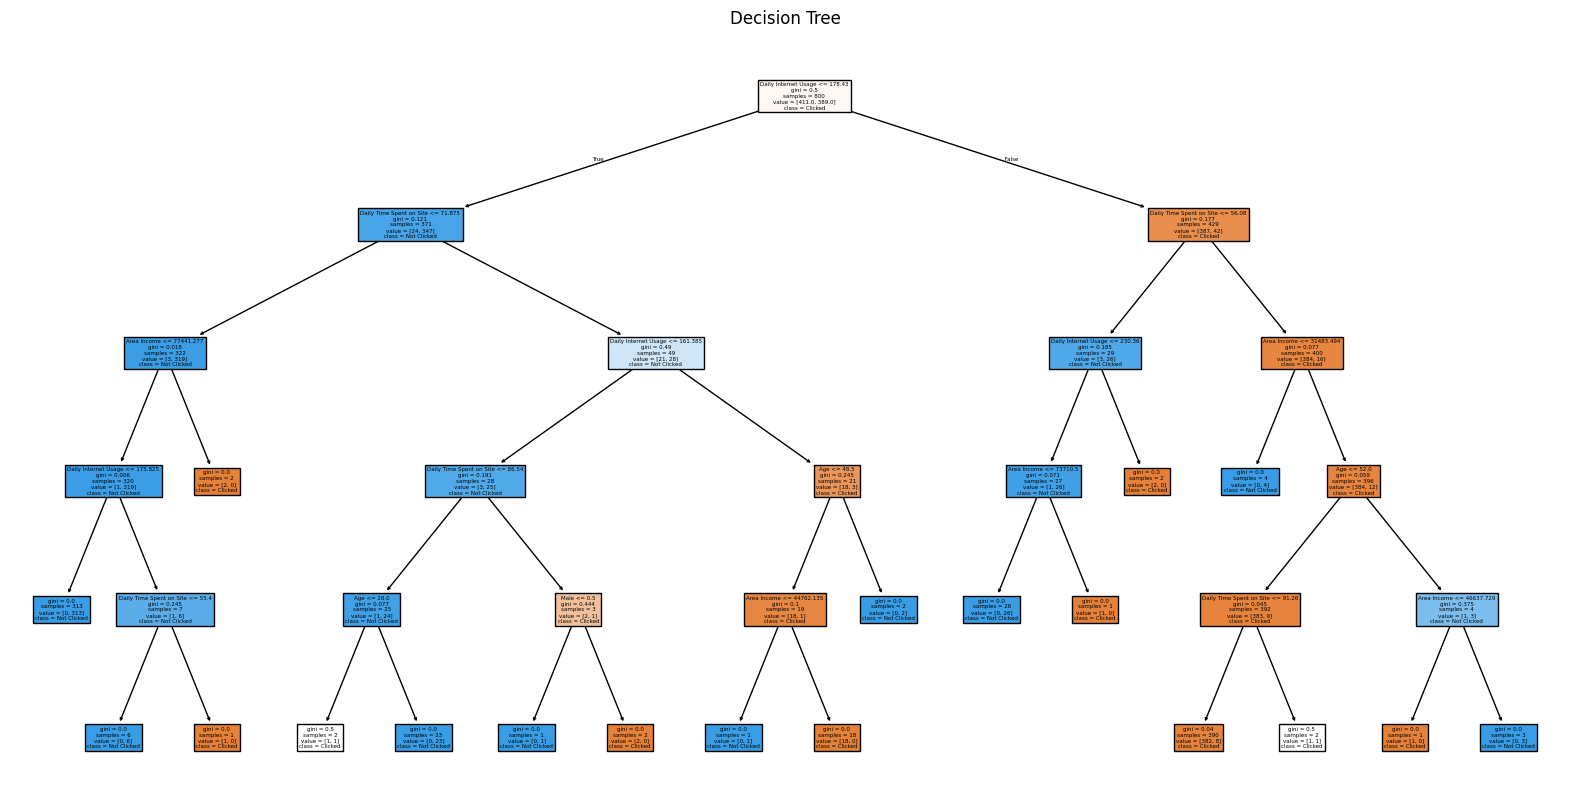

In [10]:
plt.figure(figsize=(20,10))
plot_tree(tree_model,feature_names=X.columns, class_names=['Clicked', 'Not Clicked'], filled=True)
plt.title("Decision Tree")
plt.show()